# 12_2.Regression(예측)(연습문제2)
- https://www.statsmodels.org/stable/gettingstarted.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
mr_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/12_3.toyota.csv', encoding="cp949")
mr_df.head()

,id,price,km
0,1,12900,23000
1,2,8500,61977
2,3,7750,69000
3,4,9799,59000
4,5,9950,57948


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

### 2.3 자료구조 살펴보기

In [4]:
mr_df.shape

(112, 3)

In [5]:
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      112 non-null    int64
 1   price   112 non-null    int64
 2   km      112 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB


In [6]:
mr_df.columns

Index(['id', 'price', 'km'], dtype='object')

## 3.기술통계

In [7]:
# 그룹별 기술통계
mr_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
id,112.0,56.500,32.476,1.0,28.75,56.5,84.25,112.0
price,112.0,9908.366,2139.274,6250.0,8400.00,9722.5,11485.00,14900.0
km,112.0,47735.071,17098.592,12500.0,34448.75,49955.5,60834.25,74963.0


## 4.Regression(예측)
- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
- 수치형 + 범주형
- dmatrix 사용


In [ ]:
# 기본
#formula = "price ~ 연면적 + 품질 + 상태 + 건축년도 + 리모델링년도 + 지하면적 \
#            + 차고면적 + 면적_1층 + 면적_2층 \
#            + C(주거유형) + C(판매유형) + C(판매조건)"

In [10]:
# 코드 이용
columns = ['km']

formula = "price ~ " + " + ".join(columns)
formula

'price ~ km'

In [11]:
# dmatrix 이용
from patsy import dmatrices

y, X = dmatrices(formula,
                 data = mr_df,
                 return_type = 'dataframe')

In [12]:
X

,Intercept,km
0,1.0,23000.0
1,1.0,61977.0
2,1.0,69000.0
3,1.0,59000.0
4,1.0,57948.0
...,...,...
107,1.0,20105.0
108,1.0,29716.0
109,1.0,35230.0
110,1.0,50967.0


In [13]:
model = sm.OLS(y, X)   # 모델 생성
result = model.fit()   # 모델 실행

In [14]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     593.6
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           3.90e-46
Time:                        09:42:13   Log-Likelihood:                -913.34
No. Observations:                 112   AIC:                             1831.
Df Residuals:                     110   BIC:                             1836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.539e+04    239.045     64.398      0.0

## 5.가정검정
- https://ethanweed.github.io/pythonbook/05.04-regression.html#regressionnormality
- 잔차의 등분산성: Breusch-Pagan
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

### 5.1 기본 검정
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

In [15]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     593.6
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           3.90e-46
Time:                        09:42:15   Log-Likelihood:                -913.34
No. Observations:                 112   AIC:                             1831.
Df Residuals:                     110   BIC:                             1836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.539e+04    239.045     64.398      0.0

### 5.2 잔차의 등분산 검정
- 잔차의 등분산성 테스트: Breush-Pagan 테스트:


In [16]:
# 잔차의 등분산성 테스트: Breush-Pagan 테스트:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 2.271460007835536),
 ('p-value', 0.13177570853520157),
 ('f-value', 2.2770794260066816),
 ('f p-value', 0.134165920982981)]

In [17]:
# 잔차 플롯

# 표준화 잔차 생성
influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict(X)

# 데이터 프레임으로 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df

,pred,res_standard
0,12750.876717,0.177989
1,8271.708838,0.270732
2,7464.638104,0.339741
3,8613.820411,1.403846
4,8734.714390,1.438999
...,...,...
107,13083.564995,0.438420
108,11979.085879,-0.034559
109,11345.426755,-0.468599
110,9536.958558,1.132744


<Axes: >

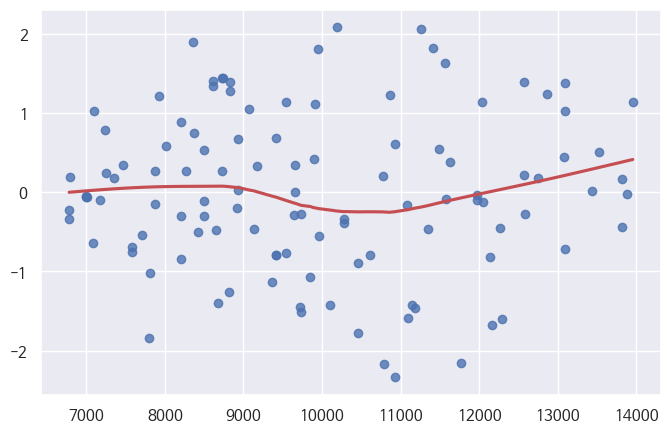

In [18]:
## 잔차 plot
plt.rc("figure", figsize=(8, 5))
sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color="r"),
            data = regplot_df)

### 5.3 잔차의 정규성 검정

In [19]:
# shapiro test
pg.normality(result.resid)

,W,pval,normal
0,0.987276,0.373695,True


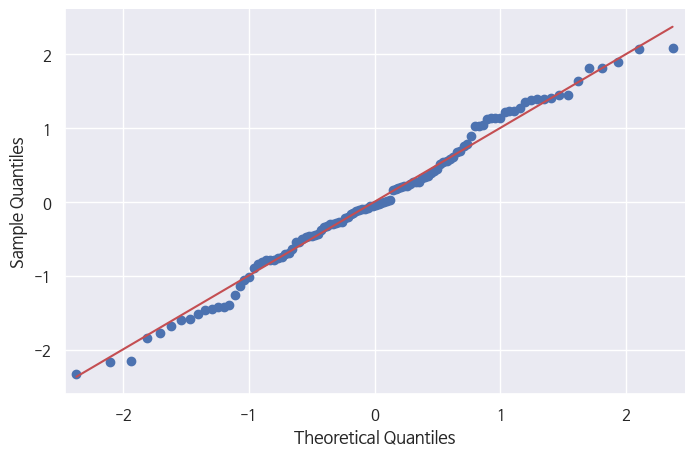

In [20]:
## QQ plot
plt.rc("figure", figsize=(8, 5))
sm.qqplot(res_standard, line = 's')
sns.despine()

### 5.4 이상치 제거

In [21]:
# 표준화 잔차를 이용한 이상치 확인
stud_res = result.outlier_test()
stud_res.sort_values(by = "student_resid", ascending = False).head(5)

,student_resid,unadj_p,bonf(p)
29,2.113709,0.036821,1.0
69,2.096637,0.038339,1.0
64,1.913927,0.058252,1.0
53,1.835471,0.069162,1.0
80,1.824634,0.070795,1.0


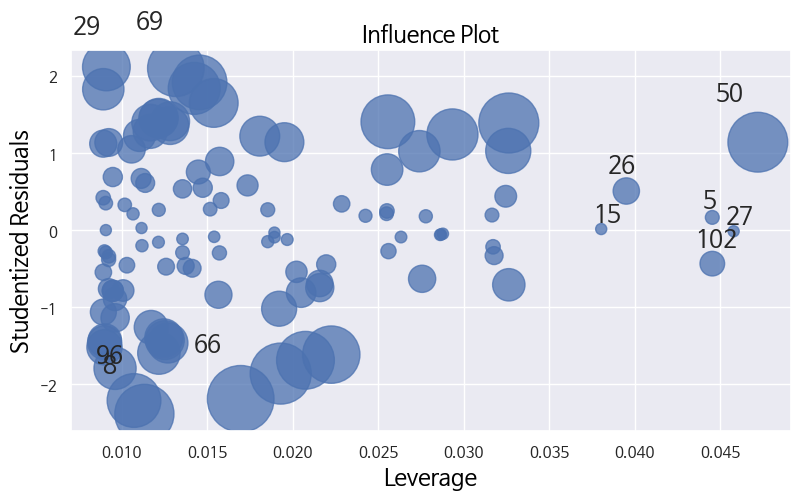

In [22]:
## cooks_distance를 이용한 이상치 확인
## https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

fig = sm.graphics.influence_plot(result, criterion="cooks")
plt.rc("figure", figsize=(8, 5))
plt.rc("font", size = 7)
fig.tight_layout(pad = 1.0)

In [23]:
# cooks_distance를 이용한 이상치 확인
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(result).cooks_distance
pd.DataFrame(test_class).T.sort_values(by = 0, ascending = False).head(10)

,0,1
66,0.039998,0.960805
34,0.033388,0.967173
57,0.032180,0.968342
50,0.031972,0.968543
8,0.031280,0.969213
84,0.029749,0.970697
94,0.029311,0.971122
69,0.028459,0.971949
64,0.026422,0.973930
96,0.025606,0.974725


In [25]:
# 이상치 제거
#mr_df = mr_df.drop(120)

### 5.5 선형성

<Axes: xlabel='pred', ylabel='price'>

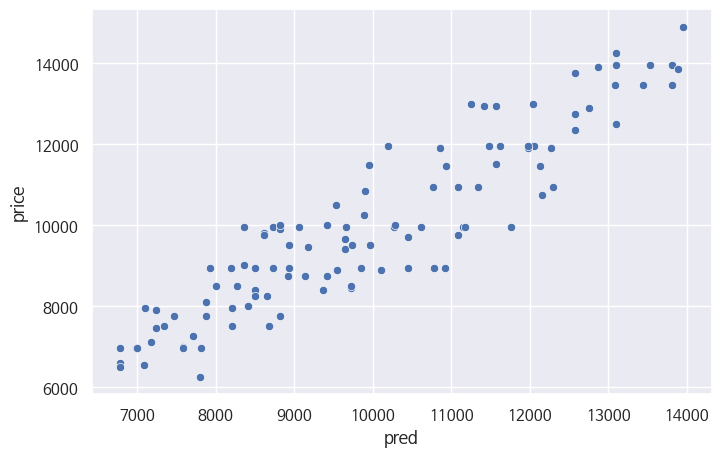

In [26]:
# 회귀도표: 예측치 vs 실제값
sns.scatterplot(x = regplot_df["pred"], y = mr_df["price"])

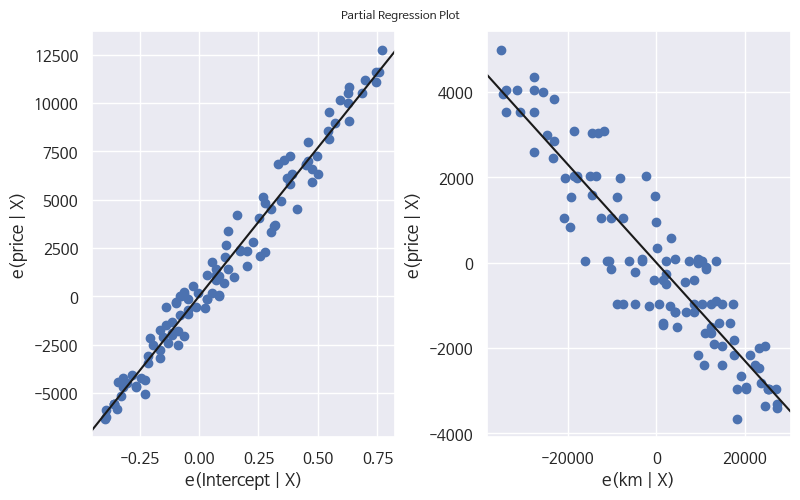

In [28]:
# 부분 회귀 도표
plt.rc("figure", figsize=(8, 5))
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad = 1.0)

### 5.6 다중 공선성
- VIF 10이상 삭제

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

   VIF Factor   features
0         8.9  Intercept
1         1.0         km
